# Stock Market Prediction using Numerical and Textual Analysis. 
 - Isha Roy. (GRIP @ The Sparks Foundation)

---


**Objective:**
- Creating a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices.
- Sentimental analysis of news headlines.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [4]:
#Store the data in a data frame
dataset = pd.read_csv('^BSESN (2).csv',index_col="Date",parse_dates=True )

In [5]:
dataset.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570313,25623.349609,25623.349609,9100.0
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300.0
2016-01-06,25628.230469,25632.570313,25357.699219,25406.330078,25406.330078,13400.0
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800.0
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900.0
2016-01-11,24787.109375,24961.880859,24598.900391,24825.039063,24825.039063,10600.0


In [6]:
dataset.tail(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539063,46973.539063,13700.0
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.isnull().sum()


Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [8]:
dataset.shape


(1234, 6)

In [9]:
# Drop null values
dataset.dropna(inplace=True)

In [10]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:

dataset.shape

(1229, 6)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1229 entries, 2016-01-04 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1229 non-null   float64
 1   High       1229 non-null   float64
 2   Low        1229 non-null   float64
 3   Close      1229 non-null   float64
 4   Adj Close  1229 non-null   float64
 5   Volume     1229 non-null   float64
dtypes: float64(6)
memory usage: 67.2 KB


<ipython-input-28-631630e8595c>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


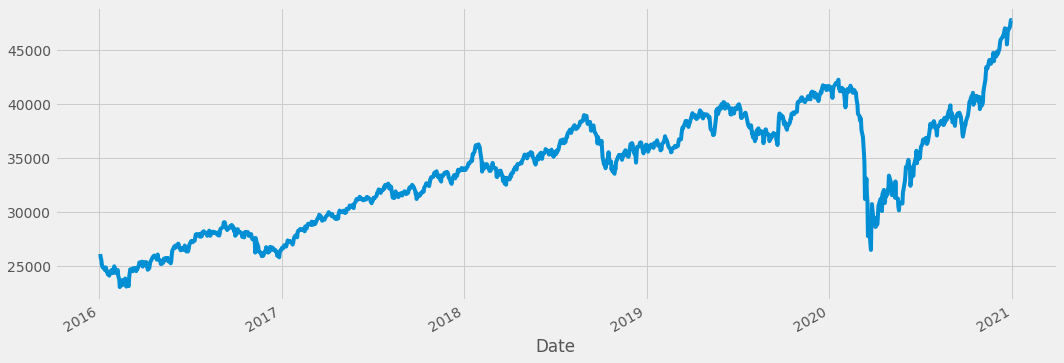

In [28]:
dataset['Open'].plot(figsize=(16,6))
ax = plt.axes()
plt.show()
plt.style.use('fivethirtyeight')

In [29]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,25333.315290,25381.990234,25053.849889,25129.035435,25129.035435,11628.571429
2016-01-13,25145.904018,25216.278739,24881.152623,25019.143973,25019.143973,12328.571429
2016-01-14,24983.261161,25109.378906,24732.505580,24903.805525,24903.805525,12985.714286


<AxesSubplot:xlabel='Date'>

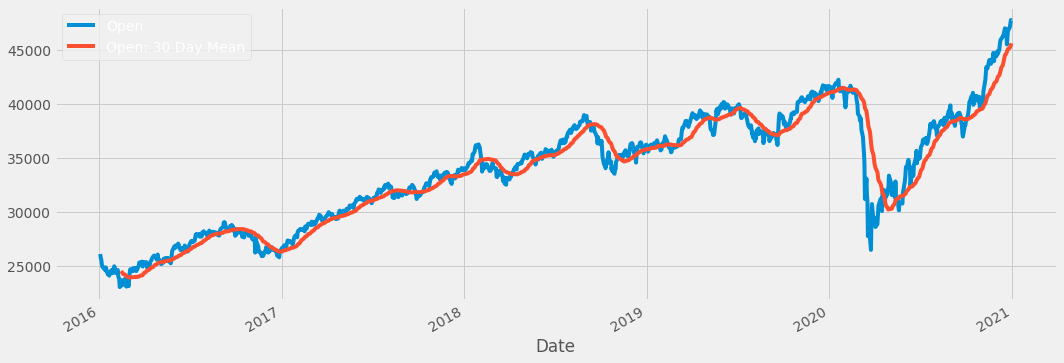

In [31]:
dataset['Open: 30 Day Mean'] = dataset['Open'].rolling(window=30).mean()
dataset[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

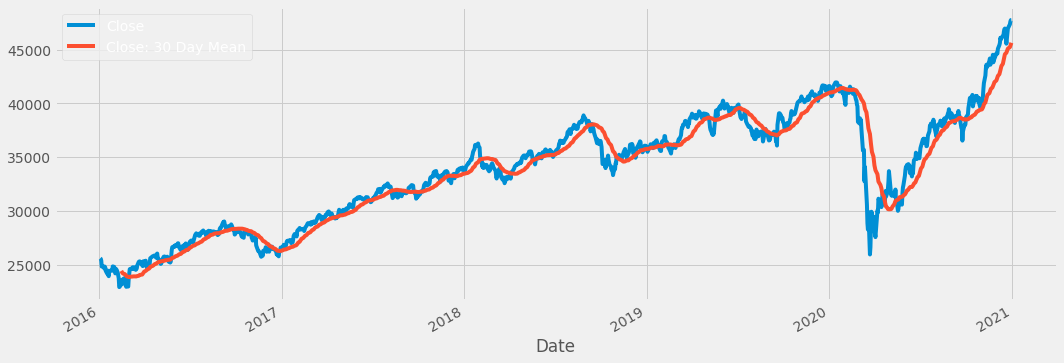

In [32]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [33]:
df1=dataset.reset_index()['Close']

In [34]:
df1

0       25623.349609
1       25580.339844
2       25406.330078
3       24851.830078
4       24934.330078
            ...     
1224    46973.539063
1225    47353.750000
1226    47613.078125
1227    47746.218750
1228    47751.328125
Name: Close, Length: 1229, dtype: float64

In [35]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
df1

array([[0.10772474],
       [0.10599044],
       [0.09897378],
       ...,
       [0.99442529],
       [0.99979397],
       [1.        ]])

**Split dataset**

In [37]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(798, 431)

In [39]:
train_data

array([[0.10772474],
       [0.10599044],
       [0.09897378],
       [0.07661445],
       [0.07994113],
       [0.07553415],
       [0.06976751],
       [0.07670636],
       [0.07343458],
       [0.06061449],
       [0.04986146],
       [0.06161454],
       [0.0447674 ],
       [0.04074199],
       [0.05983307],
       [0.06186089],
       [0.06212063],
       [0.06120044],
       [0.07737493],
       [0.07552572],
       [0.06400008],
       [0.05127081],
       [0.05591241],
       [0.06714413],
       [0.05385552],
       [0.04311178],
       [0.03254382],
       [0.        ],
       [0.00138265],
       [0.02428634],
       [0.00968329],
       [0.01734064],
       [0.02812116],
       [0.03053773],
       [0.03374903],
       [0.01848221],
       [0.00552832],
       [0.00097461],
       [0.00816431],
       [0.00202302],
       [0.0333684 ],
       [0.05206357],
       [0.06674168],
       [0.06833406],
       [0.06884818],
       [0.07428097],
       [0.06740095],
       [0.071

In [40]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(697, 100)
(697,)


(None, None)

In [43]:

print(X_test.shape), print(y_test.shape)

(330, 100)
(330,)


(None, None)

In [44]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
print(X_train.shape), print(y_train.shape)

(697, 100, 1)
(697,)


(None, None)

**Creating Long Short-Term Memory Model**

In [46]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_LSTM=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - 48s 2s/step - loss: 0.0688 - val_loss: 0.0299
Epoch 2/100
11/11 [==============================] - 7s 627ms/step - loss: 0.0069 - val_loss: 0.0103
Epoch 3/100
11/11 [==============================] - 6s 597ms/step - loss: 0.0039 - val_loss: 0.0222
Epoch 4/100
11/11 [==============================] - 6s 587ms/step - loss: 0.0024 - val_loss: 0.0093
Epoch 5/100
11/11 [==============================] - 6s 598ms/step - loss: 0.0013 - val_loss: 0.0073
Epoch 6/100
11/11 [==============================] - 6s 599ms/step - loss: 9.8901e-04 - val_loss: 0.0081
Epoch 7/100
11/11 [==============================] - 7s 604ms/step - loss: 8.8759e-04 - val_loss: 0.0079
Epoch 8/100
11/11 [==============================] - 7s 630ms/step - loss: 8.5295e-04 - val_loss: 0.0074
Epoch 9/100
11/11 [==============================] - 7s 634ms/step - loss: 7.5080e-04 - val_loss: 0.0072
Epoch 10/100
11/11 [==============================] - 7s 619ms/step - loss: 8

**Plotting loss**

In [50]:
def plot_learningCurve(history,epochs):
    
    ## Plot training and validation loss value
    epoch_range= range(1,epochs+1)
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['Train', 'val'],loc='upper_left')
    plt.show()

ValueError: Unrecognized location 'upper_left'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


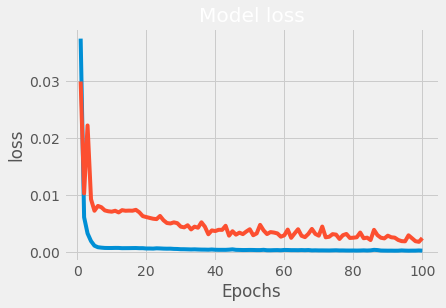

In [51]:
plot_learningCurve(history_LSTM,100)

**Prediction**

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

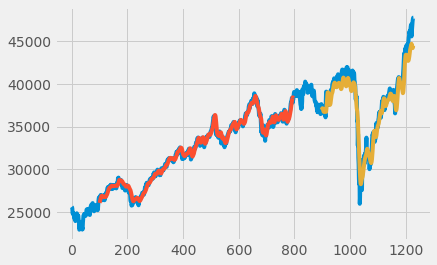

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Model Definition with Conv1D**

In [55]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten


In [56]:
# define model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

In [57]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                156850    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 157,093
Trainable params: 157,093
Non-trainable params: 0
_________________________________________________________________


In [58]:
history_CNN=model_cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - 5s 129ms/step - loss: 0.0538 - val_loss: 0.0392
Epoch 2/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0047 - val_loss: 0.0310
Epoch 3/100
11/11 [==============================] - 1s 50ms/step - loss: 0.0029 - val_loss: 0.0264
Epoch 4/100
11/11 [==============================] - 1s 66ms/step - loss: 0.0022 - val_loss: 0.0231
Epoch 5/100
11/11 [==============================] - 1s 57ms/step - loss: 0.0017 - val_loss: 0.0193
Epoch 6/100
11/11 [==============================] - 0s 43ms/step - loss: 0.0013 - val_loss: 0.0165
Epoch 7/100
11/11 [==============================] - 0s 47ms/step - loss: 0.0012 - val_loss: 0.0148
Epoch 8/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0011 - val_loss: 0.0127
Epoch 9/100
11/11 [==============================] - 1s 54ms/step - loss: 8.5525e-04 - val_loss: 0.0121
Epoch 10/100
11/11 [==============================] - 0s 40ms/step - loss: 7.6883e-04 - val_los

ValueError: Unrecognized location 'upper_left'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


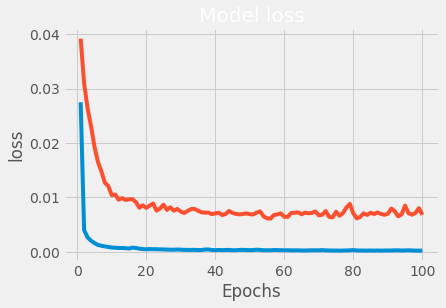

In [59]:
plot_learningCurve(history_CNN,100)

**Prediction**

In [61]:
train_predict_cnn=model_cnn.predict(X_train)
test_predict_cnn=model_cnn.predict(X_test)

In [62]:
##Transformback to original form
train_predict_cnn=scaler.inverse_transform(train_predict_cnn)
test_predict_cnn=scaler.inverse_transform(test_predict_cnn)

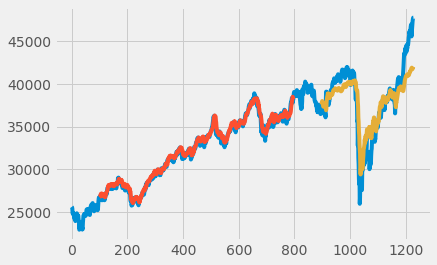

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_cnn)+look_back, :] = train_predict_cnn
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_cnn)+(look_back*2)+1:len(df1)-1, :] = test_predict_cnn
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Model Definition with Conv1D and LSTM**

In [64]:
# define model
model_mix = Sequential()
model_mix.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_mix.add(MaxPooling1D(pool_size=2))
model_mix.add(LSTM(32,return_sequences=True))
model_mix.add(LSTM(32))
model_mix.add(Dense(6, activation='relu'))
model_mix.add(Dense(1))
model_mix.compile(optimizer='adam', loss='mse')

In [65]:
model_mix.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 49, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 21,133
Trainable params: 21,133
Non-trainable params: 0
__________________________________________________

In [66]:
history_mix=model_mix.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - 29s 661ms/step - loss: 0.1453 - val_loss: 0.2077
Epoch 2/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0388 - val_loss: 0.0231
Epoch 3/100
11/11 [==============================] - 2s 205ms/step - loss: 0.0149 - val_loss: 0.0632
Epoch 4/100
11/11 [==============================] - 2s 200ms/step - loss: 0.0076 - val_loss: 0.0296
Epoch 5/100
11/11 [==============================] - 2s 197ms/step - loss: 0.0043 - val_loss: 0.0285
Epoch 6/100
11/11 [==============================] - 2s 201ms/step - loss: 0.0024 - val_loss: 0.0188
Epoch 7/100
11/11 [==============================] - 2s 201ms/step - loss: 0.0017 - val_loss: 0.0182
Epoch 8/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0014 - val_loss: 0.0180
Epoch 9/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0015 - val_loss: 0.0175
Epoch 10/100
11/11 [==============================] - 2s 213ms/step - loss: 0.0014 - val_l

ValueError: Unrecognized location 'upper_left'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


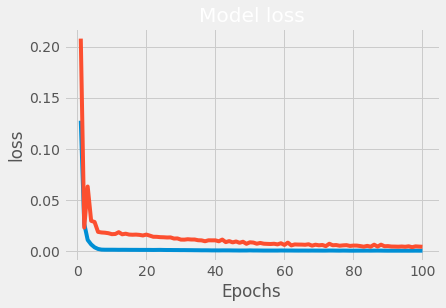

In [67]:
plot_learningCurve(history_mix,100)


**Prediction**

In [68]:

train_predict_mix=model_mix.predict(X_train)
test_predict_mix=model_mix.predict(X_test)

In [69]:

##Transformback to original form
train_predict_mix=scaler.inverse_transform(train_predict_mix)
test_predict_mix=scaler.inverse_transform(test_predict_mix)

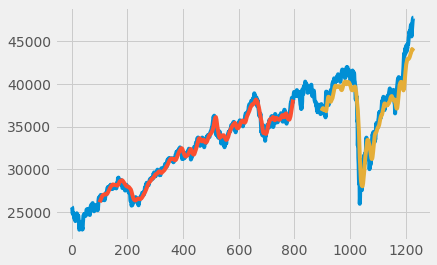

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_mix)+look_back, :] = train_predict_mix
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_mix)+(look_back*2)+1:len(df1)-1, :] = test_predict_mix
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Textual Analysis**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [95]:
# pip install TextBlob

In [96]:
dataset = pd.read_csv('india-news-headlines.csv')
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [97]:
dataset.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [99]:
dataset['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
actresses                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [100]:
city_vise = dataset[dataset['headline_category'].str.contains('^city\.[a-z]+$', regex=True
                                                             )]
city_vise

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


In [101]:
city = pd.DataFrame(columns=['city_name'])

In [102]:
city['city_name'] = city_vise.headline_category.str.split('.',expand=True)[1]

In [103]:
city_vise = pd.concat([city_vise,city],axis = 1)

In [104]:
city_vise.drop(columns=['headline_category'],axis=1,inplace=True)

In [105]:
city_vise.reset_index(inplace = True)

In [106]:
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [107]:
city_vise.city_name.unique()


array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

In [108]:
city_head = city_vise.groupby(['city_name']).agg({'headline_text':'count'})


In [109]:

city_headline_count = city_head.sort_values(by='headline_text',ascending=False)
most_headline_city = city_headline_count.head(10)
most_headline_city

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


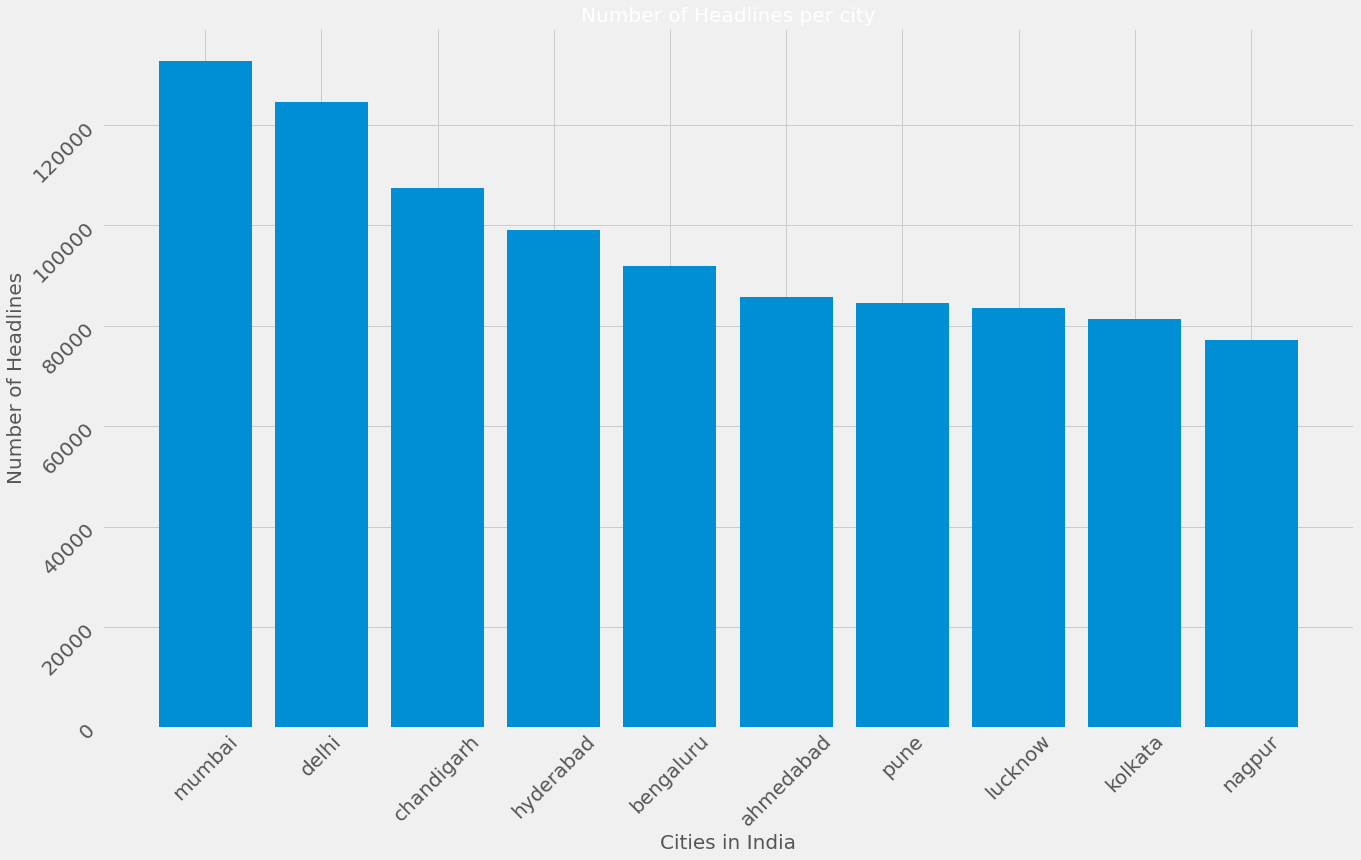

In [110]:
plt.figure(figsize=(20,12))
plt.bar(most_headline_city.index,height=most_headline_city['headline_text'])
plt.xticks(rotation = 45,fontsize=20)
plt.yticks(rotation = 45,fontsize=20)
plt.xlabel('Cities in India',fontsize=20)
plt.ylabel('Number of Headlines',fontsize=20)
plt.title('Number of Headlines per city',fontsize=20)
plt.show()

**Observation: We can find that Mumbai has highest headlines over the remaining countries followed by Delhi and Chandigarh**

In [111]:

city_vise['publish_date'] = pd.to_datetime(city_vise['publish_date'])
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


In [112]:
city_vise['Year'] = city_vise['publish_date'].apply(lambda x: (x.microsecond)//10)

In [113]:
city_vise.head()

,index,publish_date,headline_text,city_name,Year
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru,2001
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna,2001
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru,2001
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi,2001
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna,2001


In [114]:
city_vise_dup = city_vise.copy()
city_vise_dup['Headlines Count'] = 1
city_vise_dup.head()

,index,publish_date,headline_text,city_name,Year,Headlines Count
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru,2001,1
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna,2001,1
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru,2001,1
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi,2001,1
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna,2001,1


In [115]:
most_headline_city.head()

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857


In [116]:
city_vise_year_count = pd.Series(city_vise_dup.groupby(['Year'])['headline_text'].count())


In [117]:
city_vise_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: headline_text, dtype: int64

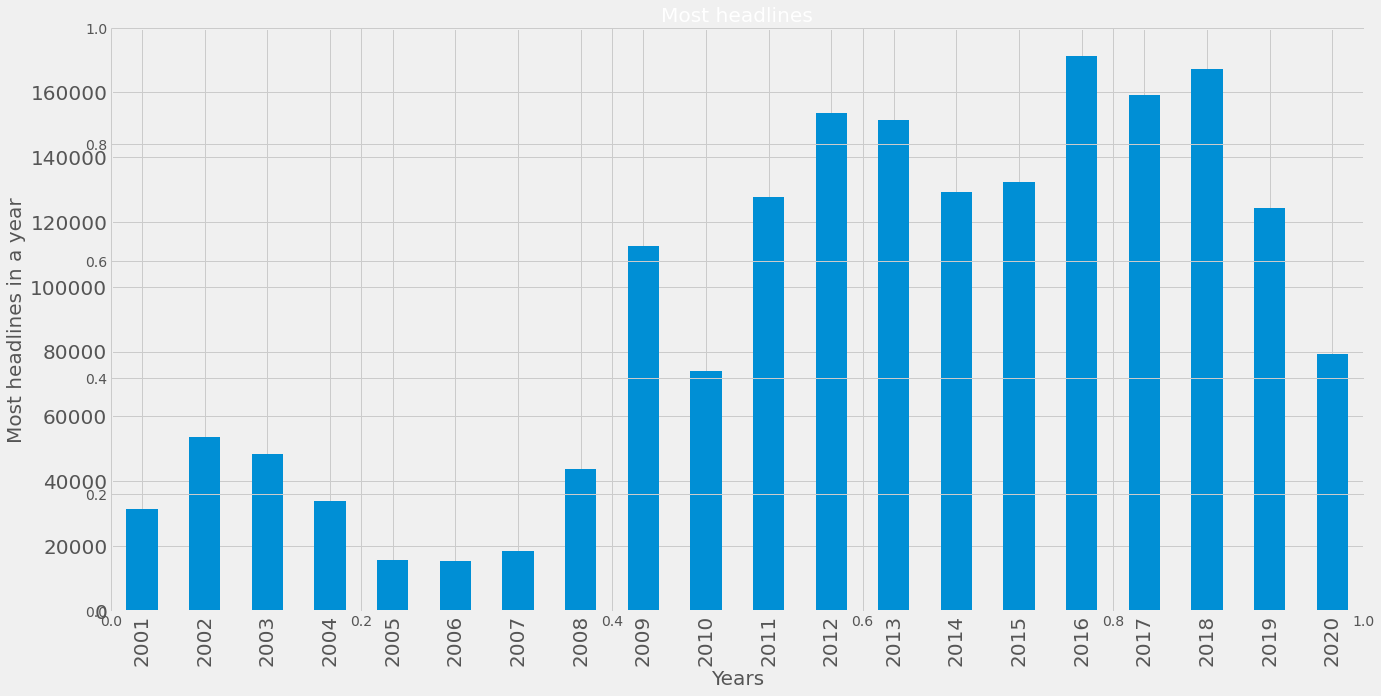

<Figure size 1440x720 with 0 Axes>

In [118]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_vise_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Most headlines" ,fontsize = 20)
a.set_ylabel('Most headlines in a year',fontsize=20)
a.set_xlabel("Years",fontsize = 20)



plt.show()

**Observation: We can find that 2016 has the most news headlines.**


In [119]:
dataset.head()


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [120]:
new_dataset = dataset.copy()

In [121]:
new_dataset['category'] = new_dataset['headline_category'].str.split('.').map(lambda x: x[0])

In [122]:
new_dataset.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


In [123]:
new_dataset_top_categoris = new_dataset.groupby(['category']).agg({'headline_text':'count'}).sort_values(by = 'headline_text',ascending =False)

In [124]:
new_dataset_top_categoris_top = new_dataset_top_categoris.drop(['unknown','tv','top-stories','city','citizen','edit-page','top-headlines','world']).head(10)
new_dataset_top_categoris_top

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [125]:
new_dataset_top_categoris_top.reset_index(inplace = True)
new_dataset_top_categoris_top

,category,headline_text
0,india,285619
1,entertainment,224877
2,business,153876
3,sports,129494
4,home,77208
5,life-style,43370
6,tech,37220
7,news,13987
8,elections,9003
9,delhi-times,7356


**Observation: We can find that India, Entertainment and business are the most categories.**

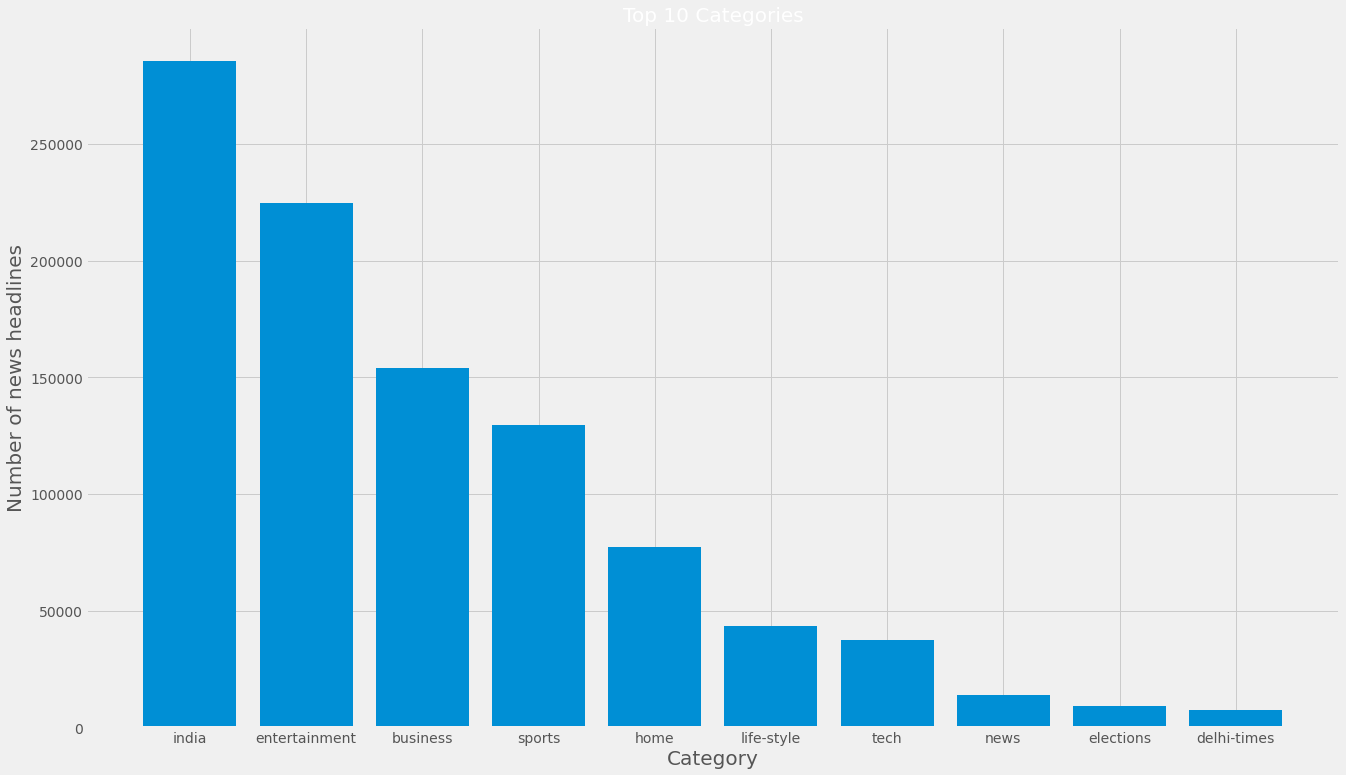

In [126]:
plt.figure(figsize=(20,12))
plt.bar(new_dataset_top_categoris_top.category, height=new_dataset_top_categoris_top.headline_text)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of news headlines',fontsize = 20)
plt.title('Top 10 Categories',fontsize = 20)
plt.show()